# 데이터 설정

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
walk_target = pd.read_csv('LifeLog\Data\\1.Training\라벨링데이터\\1.걸음걸이\\training_label.csv').rename(columns={'SAMPLE_EMAIL':"EMAIL"})
walk_lifelog = pd.read_csv('LifeLog\Data\\1.Training\원천데이터\\1.걸음걸이\\train_activity.csv')
walk_df = walk_lifelog.merge(walk_target,on='EMAIL')
walk_df.rename(columns={
    'activity_average_met': '하루간 평균 MET',
    'activity_cal_active': '하루간 활동 칼로리',
    'activity_cal_total': '하루간 총 사용 칼로리',
    'activity_class_5min': '하루간 5분당 활동 로그',
    'activity_daily_movement': '매일 움직인 거리',
    'activity_day_end': '활동 종료 시간',
    'activity_day_start': '활동 시작 시간',
    'activity_high': '고강도 활동 시간',
    'activity_inactive': '비활동 시간',
    'activity_inactivity_alerts': '비활동 알람 횟수',
    'active_low': '저강도 활동 시간',
    'activity_medium': '중강도 활동 시간',
    'activity_met_1min': '하루간 1분 당 MET 로그',
    'activity_met_min_high': '하루간 고강도 활동 MET',
    'activity_met_min_inactive': '하루간 비활동 MET',
    'activity_met_min_low': '하루간 저강도 활동 MET',
    'activity_met_min_medium': '하루간 중강도 활동 MET',
    'activity_non_wear': '미착용 시간',
    'activity_rest': '휴식 시간',
    'activity_score': '활동 점수',
    'activity_low':'저강도 활동 시간',
    'activity_score_meet_daily_targets': '활동 목표달성 점수',
    'activity_score_move_every_hour': '매 시간 당 활동유지 점수',
    'activity_score_recovery_time': '회복시간 점수',
    'activity_score_stay_active': '활동 유지 점수',
    'activity_score_training_frequency': '운동 빈도 점수',
    'activity_score_training_volume': '운동량 점수',
    'activity_steps': '매일 걸음 수',
    'activity_total': '활동 총 시간(분)',
    'CONVERT(activity_class_5min USING utf8)': '하루간 5분당 활동 로그 (UTF-8)',
    'CONVERT(activity_met_1min USING utf8)': '하루간 1분당 MET 로그 (UTF-8)',
    'EMAIL': '이메일',
    'DIAG_NM': '진단명'
}, inplace=True)


# 데이터 INFO 정보 확인

In [2]:
walk_df.info()
print(f"Object 칼럼: {walk_df.select_dtypes('object').columns}")
print(f"float64 칼럼: {walk_df.select_dtypes('float64').columns}")
print(f"int64 칼럼: {walk_df.select_dtypes('int64').columns}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9705 entries, 0 to 9704
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   이메일                     9705 non-null   object 
 1   하루간 평균 MET              9705 non-null   float64
 2   하루간 활동 칼로리              9705 non-null   int64  
 3   하루간 총 사용 칼로리            9705 non-null   int64  
 4   하루간 5분당 활동 로그           9705 non-null   object 
 5   매일 움직인 거리               9705 non-null   int64  
 6   활동 종료 시간                9705 non-null   object 
 7   활동 시작 시간                9705 non-null   object 
 8   고강도 활동 시간               9705 non-null   int64  
 9   비활동 시간                  9705 non-null   int64  
 10  비활동 알람 횟수               9705 non-null   int64  
 11  저강도 활동 시간               9705 non-null   int64  
 12  중강도 활동 시간               9705 non-null   int64  
 13  하루간 1분 당 MET 로그         9705 non-null   object 
 14  하루간 고강도 활동 MET          9705 non-null   

칼럼 dtype
- float64 1개,
- int64 23개
- object 8개

# WALK_DF 결측치 확인
- 결측치는 존재하지 않음

In [3]:
walk_df.isnull().sum()

이메일                       0
하루간 평균 MET                0
하루간 활동 칼로리                0
하루간 총 사용 칼로리              0
하루간 5분당 활동 로그             0
매일 움직인 거리                 0
활동 종료 시간                  0
활동 시작 시간                  0
고강도 활동 시간                 0
비활동 시간                    0
비활동 알람 횟수                 0
저강도 활동 시간                 0
중강도 활동 시간                 0
하루간 1분 당 MET 로그           0
하루간 고강도 활동 MET            0
하루간 비활동 MET               0
하루간 저강도 활동 MET            0
하루간 중강도 활동 MET            0
미착용 시간                    0
휴식 시간                     0
활동 점수                     0
활동 목표달성 점수                0
매 시간 당 활동유지 점수            0
회복시간 점수                   0
활동 유지 점수                  0
운동 빈도 점수                  0
운동량 점수                    0
매일 걸음 수                   0
활동 총 시간(분)                0
하루간 5분당 활동 로그 (UTF-8)     0
하루간 1분당 MET 로그 (UTF-8)    0
진단명                       0
dtype: int64

# 32개의 칼럼 중에서 DIAG_NM (진단명) 치매를 Target을 잘 분류할 수 있는 칼럼이 어떤게 있을까?
- Numerical Columns (수치형 데이터 칼럼만 확인)
- 진단명 Level들 수치형으로 변환

In [4]:
target = walk_df[['진단명']]
walk_df = walk_df.select_dtypes('number')
walk_df = pd.concat([walk_df,target],axis=1)
walk_df.head()

,하루간 평균 MET,하루간 활동 칼로리,하루간 총 사용 칼로리,매일 움직인 거리,고강도 활동 시간,비활동 시간,비활동 알람 횟수,저강도 활동 시간,중강도 활동 시간,하루간 고강도 활동 MET,하루간 비활동 MET,하루간 저강도 활동 MET,하루간 중강도 활동 MET,미착용 시간,휴식 시간,활동 점수,활동 목표달성 점수,매 시간 당 활동유지 점수,회복시간 점수,활동 유지 점수,운동 빈도 점수,운동량 점수,매일 걸음 수,활동 총 시간(분),진단명
0,1.28125,196,2251,3353,0,714,0,201,6,0,8,133,20,0,519,87,78,100,100,54,100,97,4212,207,MCI
1,1.25000,145,2159,2516,0,719,0,131,9,0,9,82,28,117,464,83,60,100,100,58,96,96,3306,140,MCI
2,1.21875,118,2140,1716,0,708,1,125,6,0,12,66,19,0,601,73,43,95,100,55,71,83,2550,131,MCI
3,1.28125,180,2240,2791,0,705,0,203,5,0,10,122,15,85,442,70,43,100,100,58,71,59,4009,208,MCI
4,1.46875,374,2559,5393,0,437,0,511,6,0,18,268,21,33,453,70,43,100,100,89,40,46,8081,517,MCI


## Target (진단명) Levels 수치형으로 변환
- Sparse Vector로 변환 (One Hot Encoding)
- LabelEncoder로 변환

근데 필자는 Label Encoder로 변환할 것이다.

In [5]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
encoded_result = ohe.fit_transform(walk_df[['진단명']])
pd.DataFrame(encoded_result.toarray(),columns=ohe.get_feature_names_out())

,진단명_CN,진단명_Dem,진단명_MCI
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
9700,1.0,0.0,0.0
9701,1.0,0.0,0.0
9702,1.0,0.0,0.0
9703,1.0,0.0,0.0


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
walk_df['진단명'] = le.fit_transform(walk_df['진단명'])
feature_names = walk_df.columns
walk_df

,하루간 평균 MET,하루간 활동 칼로리,하루간 총 사용 칼로리,매일 움직인 거리,고강도 활동 시간,비활동 시간,비활동 알람 횟수,저강도 활동 시간,중강도 활동 시간,하루간 고강도 활동 MET,하루간 비활동 MET,하루간 저강도 활동 MET,하루간 중강도 활동 MET,미착용 시간,휴식 시간,활동 점수,활동 목표달성 점수,매 시간 당 활동유지 점수,회복시간 점수,활동 유지 점수,운동 빈도 점수,운동량 점수,매일 걸음 수,활동 총 시간(분),진단명
0,1.28125,196,2251,3353,0,714,0,201,6,0,8,133,20,0,519,87,78,100,100,54,100,97,4212,207,2
1,1.25000,145,2159,2516,0,719,0,131,9,0,9,82,28,117,464,83,60,100,100,58,96,96,3306,140,2
2,1.21875,118,2140,1716,0,708,1,125,6,0,12,66,19,0,601,73,43,95,100,55,71,83,2550,131,2
3,1.28125,180,2240,2791,0,705,0,203,5,0,10,122,15,85,442,70,43,100,100,58,71,59,4009,208,2
4,1.46875,374,2559,5393,0,437,0,511,6,0,18,268,21,33,453,70,43,100,100,89,40,46,8081,517,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9700,1.34375,249,2351,4411,1,780,4,167,22,7,10,106,82,0,470,61,25,43,100,45,40,95,4972,190,0
9701,1.53125,570,2682,11057,1,518,1,332,61,7,7,257,198,0,528,78,43,95,100,76,71,93,11878,394,0
9702,1.34375,295,2331,5135,4,578,0,173,30,28,8,99,107,0,655,70,25,100,100,70,40,95,5752,207,0
9703,1.31250,186,2280,3178,0,778,1,138,18,0,11,86,56,113,393,66,25,95,100,47,40,93,3852,156,0


# 데이터 분할

In [7]:
from sklearn.model_selection import train_test_split

X, y = walk_df.drop(columns='진단명'), walk_df['진단명']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape,y_train.shape)

(7764, 24) (7764,)


# 스케일링
필자는 원래 scale을 진행을 할 때, 데이터의 분포를 보고 어떤 스케일러를 사용할지 정하지만, 
Gaussian Filter를 사용하여, scaler를 적용하도록 하겠다.

In [8]:
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)
X_train

array([[-0.33648187, -0.7964244 , -1.09515962, ...,  0.3622063 ,
        -0.63133164,  0.94689143],
       [ 0.78971081,  0.86034996,  0.86870391, ...,  0.60689599,
         1.05433201,  0.3846285 ],
       [ 0.46794147,  0.36331765,  0.54045815, ..., -1.00805599,
         0.52696881,  1.10854202],
       ...,
       [ 0.62882614,  0.76830694,  0.68073411, ...,  0.60689599,
         1.04924654, -0.21277585],
       [-1.30178988, -1.24191261, -0.99696644, ..., -1.00805599,
        -1.33007515, -1.30216027],
       [-0.98002054, -0.81851472, -0.70519243, ...,  0.46008218,
        -0.93001821, -1.25296226]])

# 실험 

In [9]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def train_and_evaluate(model, X_train, y_train, X_test, y_test, feature_names, scale=False):
    if scale:
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('model', model)
        ])
        pipeline.fit(X_train, y_train)
        train_score = pipeline.score(X_train, y_train)
        test_score = pipeline.score(X_test, y_test)
        feature_importances = None
    else:
        model.fit(X_train, y_train)
        train_score = model.score(X_train, y_train)
        test_score = model.score(X_test, y_test)
        feature_importances = getattr(model, 'feature_importances_', None)
    print(f"Model: {model}")
    print(f"Train accuracy: {train_score:.4f}")
    print(f"Test accuracy: {test_score:.4f}")
    if feature_importances is not None:
        print("Feature importances:", feature_importances)
    print()

    return {'feature_importances': feature_importances, 'train_score':train_score, 'test_score':test_score, 'feature_names': feature_names}
# 사용 예시
RF_result = train_and_evaluate(RandomForestClassifier(n_estimators=200), X_train, y_train, X_test, y_test,feature_names)
GBC_result = train_and_evaluate(GradientBoostingClassifier(), X_train, y_train, X_test, y_test,feature_names)
Ada_result = train_and_evaluate(AdaBoostClassifier(), X_train, y_train, X_test, y_test,feature_names)
KNN_result = train_and_evaluate(KNeighborsClassifier(), X_train, y_train, X_test, y_test, feature_names, scale=True)
SVC_result = train_and_evaluate(SVC(), X_train, y_train, X_test, y_test, feature_names, scale=True)
DT_result = train_and_evaluate(DecisionTreeClassifier(), X_train, y_train, X_test, y_test,feature_names)


Model: RandomForestClassifier(n_estimators=200)
Train accuracy: 1.0000
Test accuracy: 0.6749
Feature importances: [0.02706394 0.05178238 0.06937775 0.05421235 0.0260745  0.05569324
 0.00924412 0.058114   0.04887656 0.03549125 0.04306854 0.0566376
 0.05391081 0.03656381 0.06264466 0.04720724 0.0274993  0.00897002
 0.01823092 0.04571112 0.01534577 0.03986706 0.05513167 0.05328137]

Model: GradientBoostingClassifier()
Train accuracy: 0.7132
Test accuracy: 0.6450
Feature importances: [0.00394763 0.01653189 0.14375772 0.03436458 0.04233567 0.04140323
 0.00029845 0.06176402 0.02128235 0.027608   0.04696211 0.04778965
 0.05092111 0.01843961 0.08137749 0.0483163  0.0483265  0.02944144
 0.01694441 0.04952335 0.02570716 0.0604415  0.05794571 0.0245701 ]

Model: AdaBoostClassifier()
Train accuracy: 0.6009
Test accuracy: 0.5858
Feature importances: [0.         0.         0.22619105 0.05147772 0.         0.01214897
 0.         0.09521936 0.         0.08380333 0.         0.11575017
 0.01609487 0.   

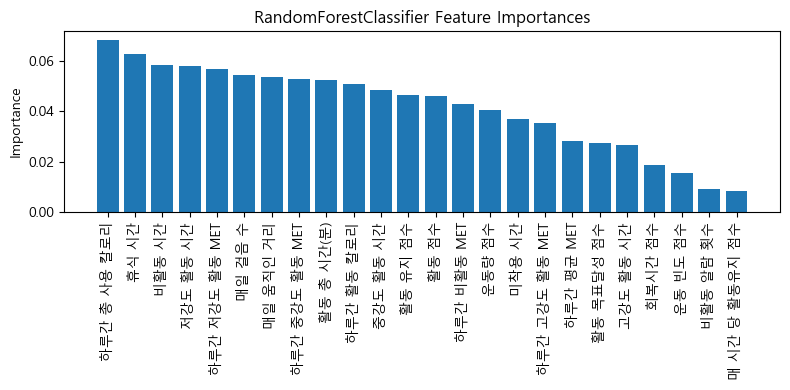

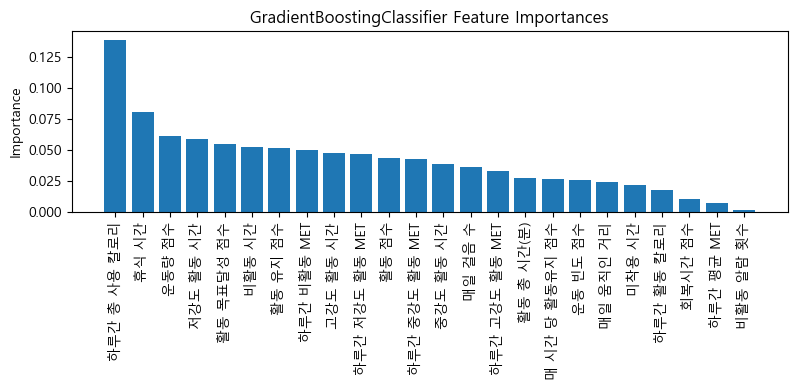

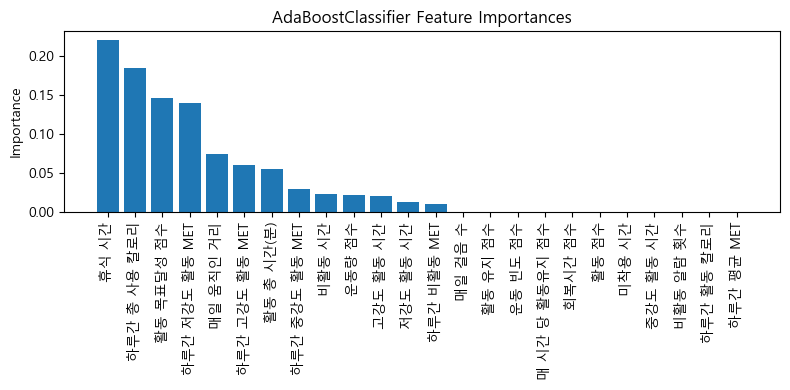

KNeighborsClassifier에는 feature_importances가 없습니다.
SVC에는 feature_importances가 없습니다.


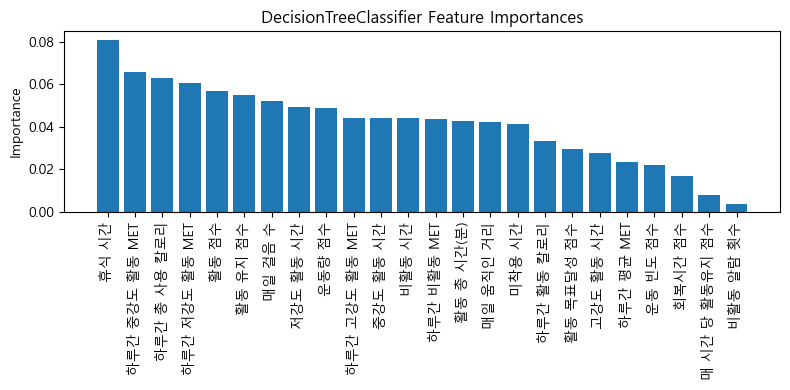

In [10]:
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np

# 윈도우 기준 예시 (맑은 고딕)
rc('font', family='Malgun Gothic')

def plot_feature_importances(feature_importances, feature_names, model_name):
    if feature_importances is None:
        print(f"{model_name}에는 feature_importances가 없습니다.")
        return
    
    indices = np.argsort(feature_importances)[::-1]  # 중요도 내림차순 정렬
    
    plt.figure(figsize=(8,4))
    plt.title(f"{model_name} Feature Importances")
    plt.bar(range(len(feature_importances)), feature_importances[indices], align='center')
    plt.xticks(range(len(feature_importances)), [feature_names[i] for i in indices], rotation=90)
    plt.ylabel("Importance")
    plt.tight_layout()
    plt.show()

results = [
    {'model_name': 'RandomForestClassifier', 'feature_importances': np.array([0.02839364, 0.05092548, 0.06836839, 0.05381402, 0.02654025, 0.05840104,
 0.00896322, 0.05798519, 0.04857759, 0.03523882, 0.04307153, 0.05691105,
 0.05304309, 0.03711588, 0.06264317, 0.04596508, 0.02729509, 0.00853787,
 0.0184881 , 0.04665537, 0.01568493, 0.04054812, 0.05436106, 0.052472 ]), 
     'feature_names': feature_names},
     
    {'model_name': 'GradientBoostingClassifier', 'feature_importances': np.array([0.00694875, 0.01773597, 0.138766, 0.02426017, 0.04731, 0.05236364,
 0.00160466, 0.05857623, 0.03884869, 0.03329438, 0.04998761, 0.04644629,
 0.04261926, 0.02213151, 0.08029351, 0.04379474, 0.05472982, 0.0268644,
 0.01060675, 0.05150453, 0.02620696, 0.06142596, 0.0362773, 0.02740287]), 
     'feature_names': feature_names},

    {'model_name': 'AdaBoostClassifier', 'feature_importances': np.array([0., 0., 0.18541518, 0.07413121, 0.02007644, 0.02300765,
 0., 0.01260807, 0., 0.06099375, 0.01029845, 0.14054961,
 0.02920398, 0., 0.22088971, 0., 0.14610061, 0.,
 0., 0., 0., 0.02152142, 0., 0.05520391]), 
     'feature_names': feature_names},

    {'model_name': 'KNeighborsClassifier', 'feature_importances': None, 'feature_names':feature_names},
    {'model_name': 'SVC', 'feature_importances': None, 'feature_names': feature_names},

    {'model_name': 'DecisionTreeClassifier', 'feature_importances': np.array([0.02328372, 0.0334642 , 0.06281477, 0.04252763, 0.02774036, 0.0440011,
 0.00356521, 0.04941048, 0.04413534, 0.04434877, 0.04394265, 0.06041837,
 0.0658717 , 0.04117014, 0.08085645, 0.05704335, 0.02948401, 0.0078526,
 0.01690538, 0.05519121, 0.0223066 , 0.04865666, 0.05229922, 0.04271007]), 
     'feature_names': feature_names}
]

for res in results:
    plot_feature_importances(res['feature_importances'], res['feature_names'], res['model_name'])

# Walk LifeLog 데이터셋을 기준하여 진단명을 잘 구분할 수 있는 칼럼 TOP-5
- 하루간 총 사용 칼로리
- 휴식 시간
- 비활동 시간
- 저강도 활동 시간
- 하루간 저강도 활동 MET
- 운동량 점수
- 활동 목표달성 점수
- 매일 움직인 거리


## TOP-5 칼럼을 기준으로 다양한 EDA 진행하기 
- 단변량 분석
    - HISTGRAM
    - BoxPlot
- 다변량 분석
    - Correlation
    - 회귀분석

# 다변량 분석

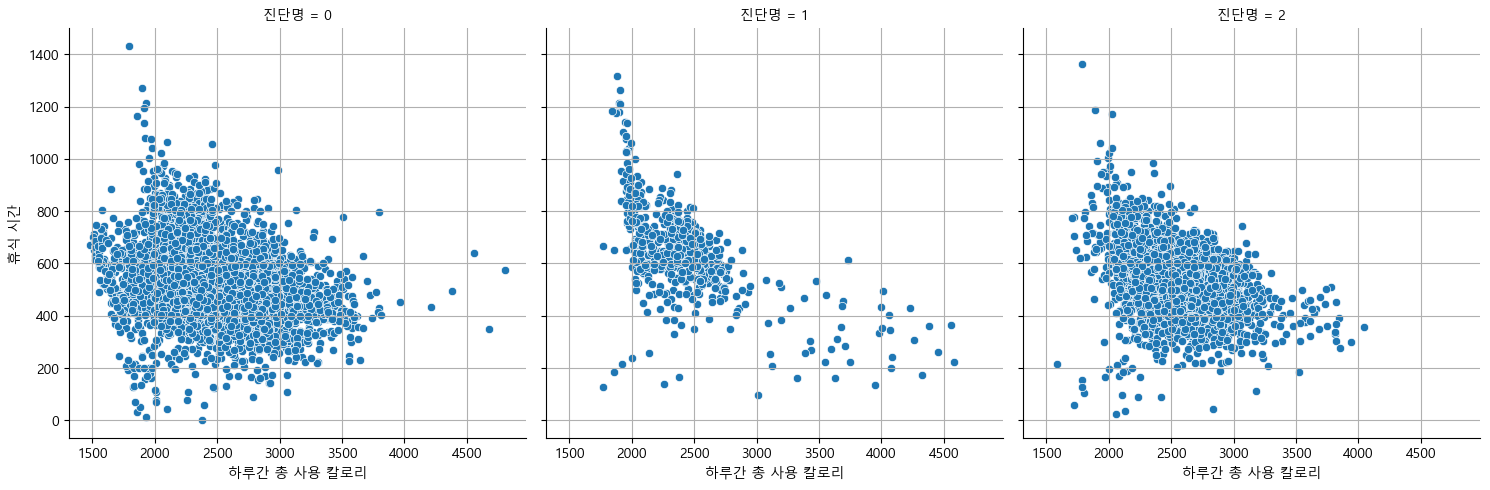

In [11]:
import seaborn as sns

g = sns.relplot(data=walk_df, x="하루간 총 사용 칼로리", y="휴식 시간", col="진단명")
g.set_axis_labels("하루간 총 사용 칼로리", "휴식 시간")  # 축 라벨 재설정 가능

# 각 축마다 grid 활성화
for ax in g.axes.flat:
    ax.grid(True)

plt.show()

# 간단 EDA (Box Plot을 이용한 이상치 파악)

In [12]:
walk_target = pd.read_csv('LifeLog\Data\\1.Training\라벨링데이터\\1.걸음걸이\\training_label.csv').rename(columns={'SAMPLE_EMAIL':"EMAIL"})
walk_lifelog = pd.read_csv('LifeLog\Data\\1.Training\원천데이터\\1.걸음걸이\\train_activity.csv')
walk_df = walk_lifelog.merge(walk_target,on='EMAIL')
walk_df.rename(columns={
    'activity_average_met': '하루간 평균 MET',
    'activity_cal_active': '하루간 활동 칼로리',
    'activity_cal_total': '하루간 총 사용 칼로리',
    'activity_class_5min': '하루간 5분당 활동 로그',
    'activity_daily_movement': '매일 움직인 거리',
    'activity_day_end': '활동 종료 시간',
    'activity_day_start': '활동 시작 시간',
    'activity_high': '고강도 활동 시간',
    'activity_inactive': '비활동 시간',
    'activity_inactivity_alerts': '비활동 알람 횟수',
    'active_low': '저강도 활동 시간',
    'activity_medium': '중강도 활동 시간',
    'activity_met_1min': '하루간 1분 당 MET 로그',
    'activity_met_min_high': '하루간 고강도 활동 MET',
    'activity_met_min_inactive': '하루간 비활동 MET',
    'activity_met_min_low': '하루간 저강도 활동 MET',
    'activity_met_min_medium': '하루간 중강도 활동 MET',
    'activity_non_wear': '미착용 시간',
    'activity_rest': '휴식 시간',
    'activity_score': '활동 점수',
    'activity_low':'저강도 활동 시간',
    'activity_score_meet_daily_targets': '활동 목표달성 점수',
    'activity_score_move_every_hour': '매 시간 당 활동유지 점수',
    'activity_score_recovery_time': '회복시간 점수',
    'activity_score_stay_active': '활동 유지 점수',
    'activity_score_training_frequency': '운동 빈도 점수',
    'activity_score_training_volume': '운동량 점수',
    'activity_steps': '매일 걸음 수',
    'activity_total': '활동 총 시간(분)',
    'CONVERT(activity_class_5min USING utf8)': '하루간 5분당 활동 로그 (UTF-8)',
    'CONVERT(activity_met_1min USING utf8)': '하루간 1분당 MET 로그 (UTF-8)',
    'EMAIL': '이메일',
    'DIAG_NM': '진단명'
}, inplace=True)

C:\Users\human-02\AppData\Local\Temp\ipykernel_14696\2724023503.py:11: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\Users\human-02\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


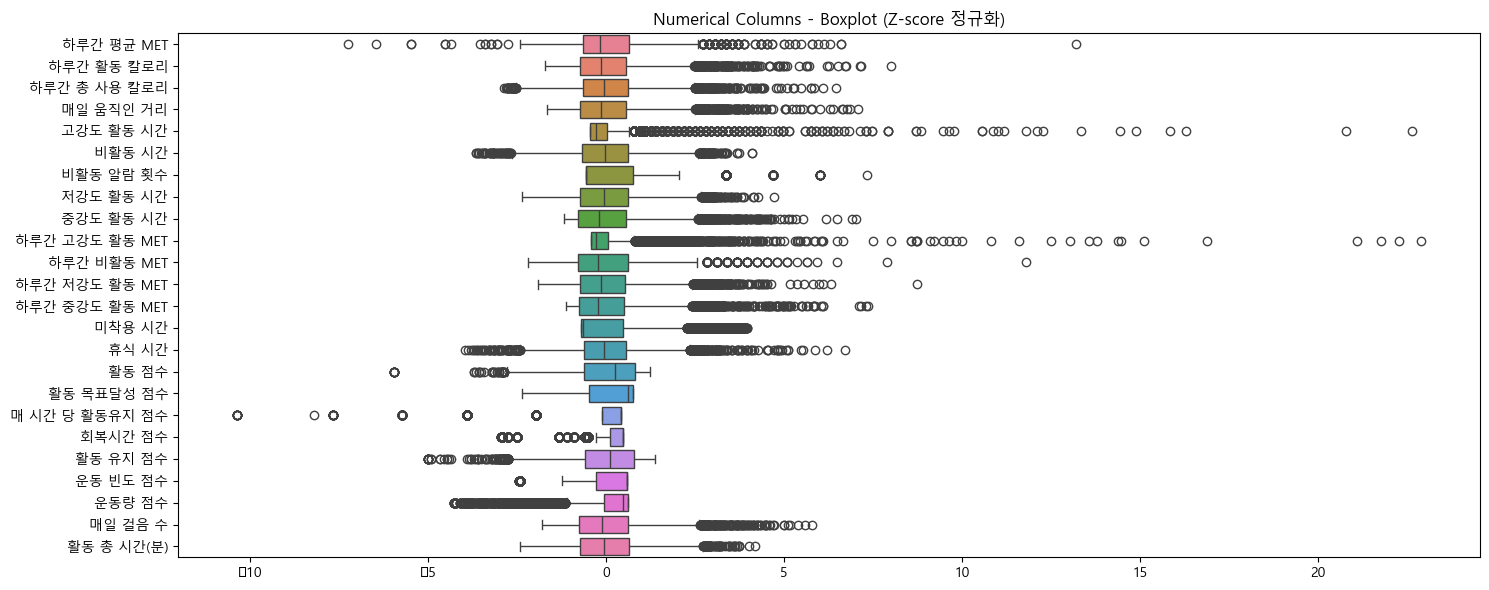

In [ ]:
num_cols = walk_df.select_dtypes(include='number')
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(num_cols)
scaled_df = pd.DataFrame(scaled, columns=num_cols.columns)

plt.figure(figsize=(15, 6))
sns.boxplot(data=scaled_df, orient='h')
plt.title('Numerical Columns - Boxplot (Z-score 정규화)')
plt.tight_layout()
plt.show()

# Correlation 확인

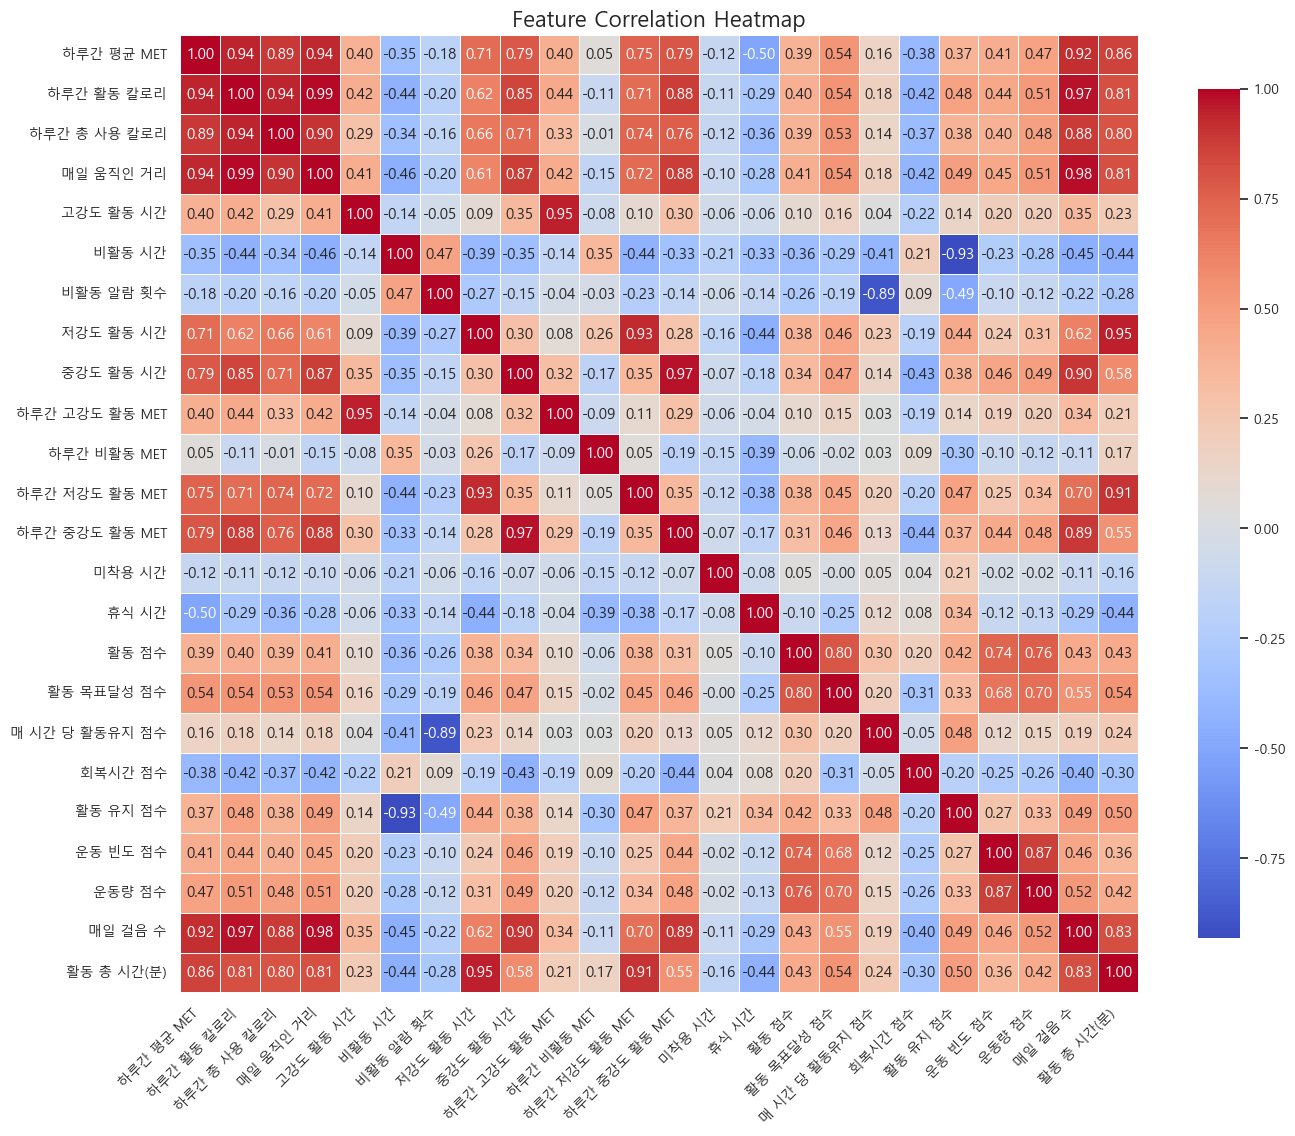

In [20]:
plt.figure(figsize=(14, 12))  # 크기 조절
sns.set(font_scale=0.9)  # 폰트 크기 조정
# 윈도우 기준 예시 (맑은 고딕)
rc('font', family='Malgun Gothic')

# 상관관계 계산
corr = walk_df.corr(numeric_only=True)

# 히트맵 그리기
sns.heatmap(corr, 
            annot=True, 
            fmt=".2f", 
            cmap="coolwarm",  # 예쁜 컬러맵
            linewidths=0.5, 
            square=True, 
            cbar_kws={"shrink": 0.8})  # 컬러바 크기 조정

plt.title("Feature Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')  # x축 라벨 각도 조정
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# 낮은 Classification Acc에 대한 고찰
- 사실 성능도 68퍼 정도 나오면, 파생 변수를 생성하거나 다른 Transformation 기법이 필요할 것이다.
- RandomForestClassifier 알고리즘에 대해서 다시 생각을 해볼 때, 시계열 데이터의 특성을 배제하고, 단순하게 Numerical Data에 대해서만 학습을 진행을 했다.
그러나 이는 잘못된 학습이라고 판단을 했다. RandomForest는 각각의 Data를 독립적인 개별로 생각을 하고, 분류를 하는 특성을 갖고 있기 때문에, 시계열의 특성을 무시한다. 따라서 지금 진행한 EDA는 옳지 않은 데이터 분석이고 방향성이 잘못되었음을 인지하고 시계열의 특성을 반영한 Classifier가 필요하거나 분석이 필요할 것으로 사료된다.
- 시계열과 관련된 Data 분석 기법이 필요
